# Education recommendation system

## load dataset and tools

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r'/content/student-scores.csv')

In [4]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


## pre-processing

In [5]:
df.shape

(2000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [ ]:
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [10]:
df['career_aspiration'].unique()

array(['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Unknown',
       'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
       'Banker', 'Writer', 'Accountant', 'Designer',
       'Construction Engineer', 'Game Developer', 'Stock Investor',
       'Real Estate Developer'], dtype=object)

### drop irrelevant features

In [11]:
df=df.drop(['id','first_name','last_name','email'],axis=1)

In [12]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


### create new features

In [13]:
df['total_score']=df['math_score']+df['history_score']+df['physics_score']+df['chemistry_score']+df['biology_score']+df['english_score']+df['geography_score']

df['avg_score']=df['total_score']/7

In [14]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,avg_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571


### Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='O':
        le.fit(df[i])
        df[i]=le.transform(df[i])



In [17]:
extracurricular_activities_map ={False:0,True:1}
part_time_job_map={False:0,True:1}
df['extracurricular_activities']=df['extracurricular_activities'].map(extracurricular_activities_map)
df['part_time_job']=df['part_time_job'].map(part_time_job_map)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      2000 non-null   int64  
 1   part_time_job               2000 non-null   int64  
 2   absence_days                2000 non-null   int64  
 3   extracurricular_activities  2000 non-null   int64  
 4   weekly_self_study_hours     2000 non-null   int64  
 5   career_aspiration           2000 non-null   int64  
 6   math_score                  2000 non-null   int64  
 7   history_score               2000 non-null   int64  
 8   physics_score               2000 non-null   int64  
 9   chemistry_score             2000 non-null   int64  
 10  biology_score               2000 non-null   int64  
 11  english_score               2000 non-null   int64  
 12  geography_score             2000 non-null   int64  
 13  total_score                 2000 

In [19]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,avg_score
0,1,0,3,0,27,9,73,81,93,97,63,80,87,574,82.000000
1,0,0,2,0,47,6,90,86,96,100,90,88,90,640,91.428571
2,0,0,9,1,13,8,81,97,95,96,65,77,94,605,86.428571
3,0,0,5,0,3,1,71,74,88,80,89,63,86,551,78.714286
4,1,0,5,0,10,15,84,77,65,65,80,74,76,521,74.428571


In [30]:
df['career_aspiration'].value_counts()

,count
career_aspiration,
12,315
3,309
15,223
2,169
9,138
0,126
6,119
10,83
13,73


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-32-93435045df32>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['career_aspiration'], discrete=True, palette='pastel')


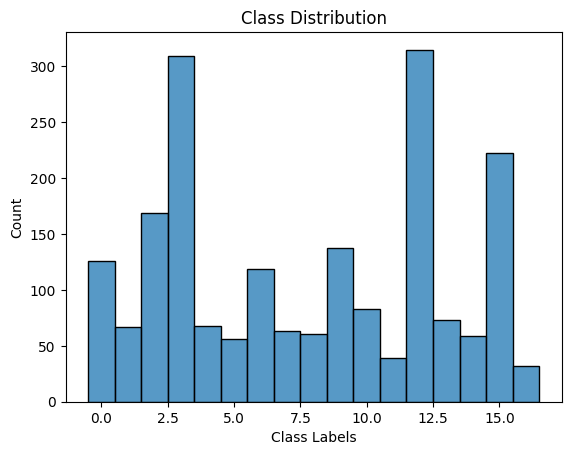

In [32]:
sns.histplot(df['career_aspiration'], discrete=True, palette='pastel')
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class Labels')
plt.show()

### balance data

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote=SMOTE(random_state=42)
X=df.drop('career_aspiration',axis=1)
y=df['career_aspiration']
x_resampled,y_resampled=smote.fit_resample(X,y)

In [35]:
y_resampled.value_counts()

,count
career_aspiration,
9,315
2,315
13,315
7,315
4,315
5,315
0,315
16,315
11,315


## train & test split

In [43]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [38]:
X_train

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,avg_score
2369,1,0,5,0,3,91,90,73,74,76,87,63,558,79.837925
3955,0,0,7,0,30,86,97,97,75,83,94,80,614,87.778311
3785,1,0,1,0,10,84,86,83,82,85,76,94,593,84.746045
120,0,1,0,0,13,66,90,83,80,76,90,91,576,82.285714
3699,1,0,3,0,12,87,75,85,91,85,71,88,585,83.637911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0,0,1,0,15,76,76,91,84,78,85,78,571,81.669866
3772,1,0,4,0,3,89,88,94,73,80,96,68,591,84.523714
5191,0,0,2,0,16,70,74,79,77,65,92,77,536,76.635813
5226,0,0,1,0,23,78,96,97,97,92,94,91,648,92.689319


### Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[ 1.31412538, -0.25626479,  0.91621796, ..., -1.68700761,
        -0.39649949, -0.38180655],
       [-0.7609624 , -0.25626479,  1.83846368, ..., -0.09852238,
         1.05518786,  1.05771135],
       [ 1.31412538, -0.25626479, -0.92827346, ...,  1.20964193,
         0.5108051 ,  0.50798975],
       ...,
       [-0.7609624 , -0.25626479, -0.46715061, ..., -0.3788433 ,
        -0.96680523, -0.96231961],
       [-0.7609624 , -0.25626479, -0.92827346, ...,  0.929321  ,
         1.93656946,  1.94803132],
       [ 1.31412538, -0.25626479,  0.45509511, ..., -0.28540299,
        -0.94088224, -0.94809327]])

## Training models

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [62]:
# creating a dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),

}

for model_name,model in models.items():
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    cm=confusion_matrix(y_test,predictions)
    cr=classification_report(y_test,predictions)
    print(f'{model_name} accuracy: {accuracy}')
    print(f'{model_name} classification_report: {cr}')
    print(f'{model_name} confusion_matrix: {cm}')

Logistic Regression accuracy: 0.4752567693744164
Logistic Regression classification_report:               precision    recall  f1-score   support

           0       0.54      0.43      0.48        69
           1       0.61      0.62      0.61        65
           2       0.18      0.09      0.12        64
           3       0.86      0.90      0.88        61
           4       0.47      0.78      0.59        65
           5       0.31      0.15      0.21        65
           6       0.43      0.67      0.52        63
           7       0.52      0.86      0.65        51
           8       0.38      0.37      0.37        63
           9       0.40      0.56      0.46        59
          10       0.43      0.33      0.37        61
          11       0.52      0.51      0.51        63
          12       0.42      0.33      0.37        76
          13       0.24      0.20      0.22        56
          14       0.48      0.60      0.53        57
          15       0.35      0.15      0.21

### model selection (Random Forest)

In [58]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(f'accuracy: {accuracy}')
print(f'confusion_matrix: {cm}')
print(f'classification_report: {cr}')

accuracy: 0.838468720821662
confusion_matrix: [[54  0  1  0  1  1  2  0  0  1  0  3  2  1  0  3  0]
 [ 0 63  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0 49  0  1  0  2  0  2  4  0  0  3  1  0  0  1]
 [ 0  2  0 57  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  2  0  0  3  0  0  0  0  0]
 [ 0  0  2  0  0 56  0  1  1  2  0  1  0  0  0  1  1]
 [ 0  0  0  0  0  1 62  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 59  0  1  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  2  0  0 53  0  1  2  0  0  0  1]
 [ 0  0  0  3  0  0  1  2  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 63  0  0  0  0  0]
 [ 2  0 11  0 12  1  5  0  0  8  0  7 24  4  0  2  0]
 [ 0  0  1  0  2  0  0  0  2  0  0  0  2 49  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0  0  1  0 54  0  0]
 [ 1  0  8  0  4  3  3  1  2  4  1  2  6  5  0 31  1]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0 59]]
classification_report:             

In [49]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=2,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 2 folds for each of 216 candidates, totalling 432 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.7719421101774043


In [59]:

best_rf = grid_search.best_estimator_


y_pred_optimized = best_rf.predict(X_test)


print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized))


Optimized Accuracy: 0.8506069094304388

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.81        69
           1       0.98      0.97      0.98        65
           2       0.70      0.73      0.72        64
           3       0.93      0.93      0.93        61
           4       0.76      0.92      0.83        65
           5       0.87      0.85      0.86        65
           6       0.81      0.94      0.87        63
           7       0.89      1.00      0.94        51
           8       0.89      0.98      0.93        63
           9       0.77      0.95      0.85        59
          10       0.95      0.92      0.93        61
          11       0.83      0.98      0.90        63
          12       0.68      0.42      0.52        76
          13       0.75      0.91      0.82        56
          14       0.98      0.98      0.98        57
          15       0.80      0.46      0.58        72
          16     

In [53]:
best_rf.predict(X_test[17].reshape(1,-1))[0]

10

In [54]:
y_test.iloc[17]

10

### saving and load files

In [ ]:
import pickle
pickle.dump(rfc,open('/Users/user/PycharmProjects/career_recommendation_system_ML_project/models/rfc.pkl','wb'))
pickle.dump(scaler,open('/Users/user/PycharmProjects/career_recommendation_system_ML_project/models/standardscaler.pkl','wb'))


In [63]:
##recommendation system
class_names = ['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Unknown',
               'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
               'Banker', 'Writer', 'Accountant', 'Designer',
               'Construction Engineer', 'Game Developer', 'Stock Investor',
               'Real Estate Developer']

def Recommendations(gender, part_time_job, absence_days, extracurricular_activities,
                    weekly_self_study_hours, math_score, history_score, physics_score,
                    chemistry_score, biology_score, english_score, geography_score,
                    total_score, average_score):
    # Encode categorical variables
    gender_encoded = 1 if gender.lower() == 'female' else 0
    part_time_job_encoded = 1 if part_time_job else 0
    extracurricular_activities_encoded = 1 if extracurricular_activities else 0

    # Create feature array
    feature_array = np.array([[gender_encoded, part_time_job_encoded, absence_days, extracurricular_activities_encoded,
                               weekly_self_study_hours, math_score, history_score, physics_score,
                               chemistry_score, biology_score, english_score, geography_score, total_score,
                               average_score]])

    # Scale features
    scaled_features = scaler.transform(feature_array)

    # Predict using the model
    probabilities = model.predict_proba(scaled_features)

    # Get top five predicted classes along with their probabilities
    top_classes_idx = np.argsort(-probabilities[0])[:3]
    top_classes_names_probs = [(class_names[idx], probabilities[0][idx]) for idx in top_classes_idx]

    return top_classes_names_probs



In [68]:
final=Recommendations('Male',False,60,False,70,65,60,50,94,71,81,6,583,76.285714)
for class_name,probability in final:
    print(f'{class_name} with probability {probability} ')

Stock Investor with probability 0.21 
Artist with probability 0.16 
Banker with probability 0.13 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
